# Tarefa 10
Implementar um algoritmo imunológico para resolver um problema de minimização.

## Autores
Renan Mateus Bernardo Nascimento
<br/>Vinícius Magalhães D'Assunção

In [1]:
import numpy as np
import random
import copy
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Classe Anticorpo
Define o TAD de um anticorpo, que possui como atributos uma lista de alelos e um valor de aptidão.

In [2]:
class Anticorpo:
    
    def __init__(self, qtd_alelos):
        self.alelos = np.zeros(qtd_alelos)
        self.aptidao = 0.0

## Classe selecao_clonal
Possui a implementação do algoritmo imunológico - seleção clonal, possuindo os métodos para inicializar a população, cálculo de aptidão, clonagem, seleção e maturação.

In [18]:
class SelecaoClonal:

    def __init__(self, tam_populacao, inicio, fim, constante_clones, tax_clonagem, ro, max_it):
        self.tam_populacao = tam_populacao
        self.inicio = inicio
        self.fim = fim
        self.constante_clones = constante_clones
        self.tax_clonagem = tax_clonagem
        self.ro = ro
        self.max_it = max_it
        self.QTD_ALELOS = 2
        self.populacao = []
        self.clones = []
        self.OFFSET = 1500
        self.delta_init = -2
        self.delta_end = 2

    '''
    ' Inicializa a lista de população
    '''

    def popular(self):
        for c in range(0, self.tam_populacao):
            ant = Anticorpo(self.QTD_ALELOS)
            for a in range(0, len(ant.alelos)):
                ant.alelos[a] = random.randrange(self.inicio, self.fim + 1)
            # Calcula a aptidao do anticorpo
            ant.aptidao = self.calcAptidao(ant.alelos[0], ant.alelos[1])
            self.populacao.append(ant)

    '''
    ' Maior aptidao da populacao
    '''

    def maiorAptidao(self, populacao):
        populacao_ordenada = sorted(
            populacao, reverse=True, key=lambda Anticorpo: Anticorpo.aptidao)
        return populacao_ordenada[0]

    '''
    ' Calcula a função de aptidão de toda a população
    '''

    def calcAptidao(self, x1, x2):
        return self.OFFSET + (x2 + 47) * np.sin(np.sqrt(abs(x2 + x1 / 2 + 47))) + x1 * np.sin(np.sqrt(abs(x1 - (x2 + 47))))

    '''
    ' Calcula a quantidade de clones a ser gerada para cada anticorpo
    '''

    def qtdeClones(self):
        return int(self.tax_clonagem * self.constante_clones)

    '''
    ' Realiza a mutacao de um clone de um anticorpo
    '''

    def maturacao(self, ant, clones):
        afinidade_normalizada = ant.aptidao / \
            self.maiorAptidao(self.populacao).aptidao
        tax_mutacao = math.exp(-self.ro * afinidade_normalizada)
        clones_mutados = []

        for clone in clones:
            for i in range(0, len(clone.alelos)):
                # Sorteia valor para decidir se o alelo sera mutado
                num = random.uniform(0, 1)
                # Muta o alelo
                if num <= tax_mutacao:
                    delta = random.uniform(self.delta_init, self.delta_end)
                    clone.alelos[i] += delta
                    # Poda valores maiores que o dominio estipulado da funcao
                    if clone.alelos[i] < self.inicio:
                        clone.alelos[i] = self.inicio
                    elif clone.alelos[i] > self.fim:
                        clone.alelos[i] = self.fim
            # Calcula aptidao do clone e o insere na lista de clones mutados
            clone.aptidao = self.calcAptidao(clone.alelos[0], clone.alelos[1])
            clones_mutados.append(clone)

        return clones_mutados

    '''
    ' Seleciona o melhor clone para se tornar o novo anticorpo da populacao
    '''

    def selecao(self):
        # Retira todos os individuos da populacao atual
        # ja que a populacao sera formada
        # pelos melhores clones dos clusters
        self.populacao[:] = []

        for clones in self.clones:
            self.populacao.append(self.maiorAptidao(clones))

    '''
    ' Todos os anticorpos sao selecionados e gerados qtdeClones para cada
    '''

    def clonagem(self):
        qtde_clones = self.qtdeClones()
        self.clones[:] = []

        for ant in self.populacao:
            ant_clones = []
            for i in range(0, qtde_clones):
                clone = copy.deepcopy(ant)
                clone.aptidao = 0.0
                ant_clones.append(clone)
            # Realiza a maturacao dos clones de um anticorpo
            clones_mutados = self.maturacao(ant, ant_clones)
            self.clones.append(clones_mutados)


    '''
    ' Definicao da funcao eggholder sem modificacoes
    '''
    def eggholder(self, x, y):
        return(-(y + 47) * np.sin(np.sqrt(np.abs(y + x / 2 + 47))) - x * np.sin(np.sqrt(np.abs(x - (y + 47)))))


    '''
    ' Melhores anticorpos daquela populacao
    '''

    def melhoresAnticorpos(self):
        n_melhores = 3
        melhores = sorted(self.populacao, reverse=True,
                          key=lambda Anticorpo: Anticorpo.aptidao)
        print('Melhores anticorpos:')
        for ant in melhores[:n_melhores]:
            print(str(ant.alelos) + '\t=\t' + str(ant.aptidao - self.OFFSET))
        return melhores[0]

    '''
    ' Gera uma curva de nível com os anticorpos
    '''

    def gerarGrafico(self, imgID, title):
        amostras = 200
        fig = plt.figure(figsize=(10, 7))
        x = np.linspace(self.inicio, self.fim, amostras)
        y = x
        X, Y = np.meshgrid(x, y)
        Z = self.eggholder(X, Y)
        plt.figure(1)
        plt.contour(X, Y, Z)
        alelo1 = [i.alelos[0] for i in self.populacao[1:]]
        alelo2 = [i.alelos[1] for i in self.populacao[1:]]
        popOrdenada = sorted(self.populacao, reverse=True,
                             key=lambda Anticorpo: Anticorpo.aptidao)
        melhorAlelo1 = popOrdenada[0].alelos[0]
        melhorAlelo2 = popOrdenada[0].alelos[1]
        plt.plot(melhorAlelo1, melhorAlelo2, marker='o', color='red')
        plt.scatter(alelo1, alelo2, color='blue')
        plt.title(title)
        plt.show()
        print('O melhor indivíduo desta população está na cor vermelha')
        print('\n\n--------------------------------------------------------')

    '''
    ' Executa algoritmo imunologico
    '''

    def executar(self):
        self.popular()
        self.gerarGrafico(1, 'População inicial distribuída nas curvas de nível da função eggholder')
        t = 1
        # Executa o algoritmo até atinger o máximo de iteraçẽos
        while t <= self.max_it:
            self.clonagem()
            self.selecao()
            t += 1

        # Gera o gráfico de saída
        self.gerarGrafico(2, 'População final distribuída nas curvas de nível da função eggholder')
        self.melhoresAnticorpos()


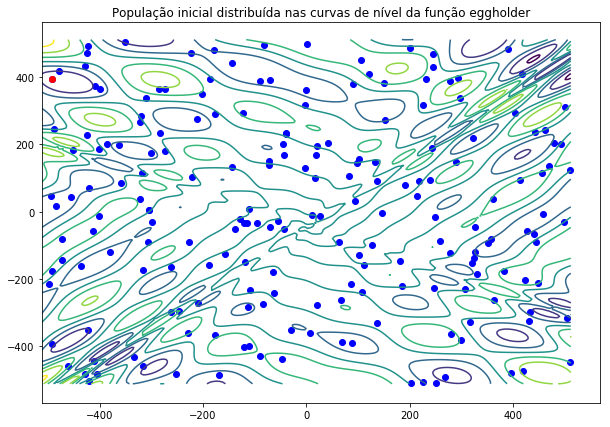

O melhor indivíduo desta população está na cor vermelha


--------------------------------------------------------


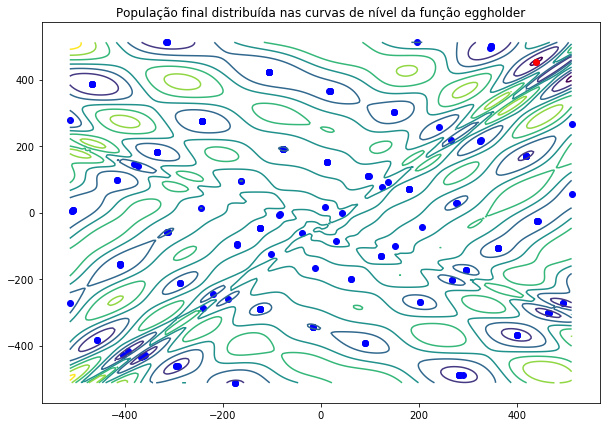

O melhor indivíduo desta população está na cor vermelha


--------------------------------------------------------
Melhores anticorpos:
[ 438.78825121  453.32487201]	=	935.249376601
[-465.69880585  385.73160488]	=	894.578832903
[-465.66817102  385.71524692]	=	894.578814695


In [19]:
tam_populacao, inicio, fim, constante_clones, tax_clonagem, ro, max_it = (200, -512, 512, 50, 0.1, 2, 300)

sc = SelecaoClonal(tam_populacao, inicio, fim,
                   constante_clones, tax_clonagem, ro, max_it)
sc.executar()